# Desafios Aula 01 Imersão Dados 04 Alura

Desafios:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação (.plot) e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

# Importando bibliotecas e dados:

In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

# 1. Realizar a média da metragem para cara um dos bairros (Paulo):

In [ ]:
#  Média do M2 por bairro:

medias_por_bairro = dados.groupby('Bairro')['Metragem'].mean()
pd.DataFrame(medias_por_bairro)

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


# 2. Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago):

In [ ]:
forma_1 = dados.groupby(['Bairro'])['Banheiros']
forma_2 = dados.groupby(['Bairro'])

# 3. Explorar alguns gráficos na documentação (.plot) e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago):

Documentação:

Other plots Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or ‘density’ for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

source: https://pandas.pydata.org/docs/user_guide/visualization.html

In [63]:
n_quartos = dados['Quartos'].value_counts()
n_vagas = dados['Vagas'].value_counts()
n_banheiros = dados.Banheiros.value_counts()

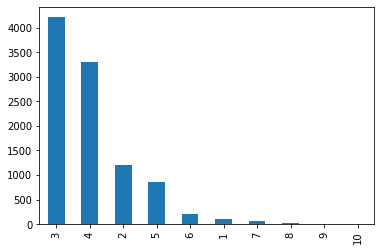

In [65]:
n_quartos.head(10).plot.bar()

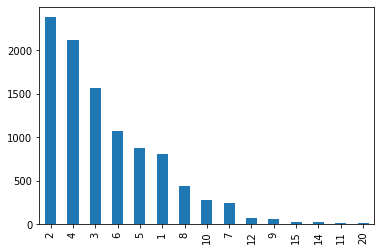

In [68]:
n_vagas.head(15).plot.bar()

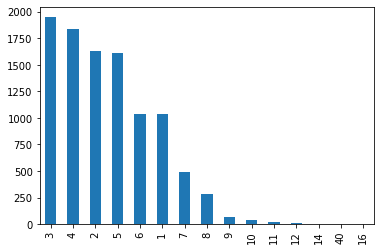

In [67]:
n_banheiros.head(30).plot.bar()

**Conclusão:** Grande parte dos imóveis possuem 2 vagas de garagem, 3 quartos e 3 banheiros.

# 4. Pegar outros estatísticas da metragem como média, mediana, mim, max (Vivi):

In [2]:
dados.groupby(['Bairro'])['Metragem'].describe()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Aclimação,88.0,253.056818,159.140245,104.0,165.00,227.5,300.00,1500.0
Alto da Boa Vista,8.0,418.875000,111.880596,315.0,347.50,378.0,448.75,595.0
Alto da Lapa,86.0,294.337209,187.674036,46.0,151.25,255.0,363.75,1133.0
Alto da Mooca,20.0,270.050000,237.306924,84.0,133.75,182.5,221.25,805.0
Alto de Pinheiros,409.0,433.444988,145.676574,100.0,344.00,412.0,505.00,1530.0
...,...,...,...,...,...,...,...,...
Vila Água Funda,5.0,152.200000,44.353128,90.0,138.00,143.0,190.00,200.0
Água Branca,13.0,191.000000,91.045776,91.0,143.00,174.0,200.00,400.0
Água Fria,12.0,165.416667,82.934211,60.0,76.25,174.5,210.50,314.0


# 5. Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [3]:
# Contagem total de bairros:

dados['Bairro'].value_counts().sort_index()

Aclimação             88
Alto da Boa Vista      8
Alto da Lapa          86
Alto da Mooca         20
Alto de Pinheiros    409
                    ... 
Vila Água Funda        5
Água Branca           13
Água Fria             12
Água Funda             2
Água Rasa              8
Name: Bairro, Length: 701, dtype: int64

In [24]:
# Quantidade de nomes de ruas nulos:

ruas_nan = dados[dados['Rua'].isnull()]
ruas_nan = ruas_nan['Bairro'].value_counts().sort_index()
ruas_nan

Aclimação              2
Alto da Boa Vista      1
Alto da Lapa          29
Alto da Mooca          5
Alto de Pinheiros    169
                    ... 
Vila do Encontro       3
Água Branca            2
Água Fria              1
Água Funda             2
Água Rasa              3
Name: Bairro, Length: 394, dtype: int64

In [51]:
# Criando o DF comparativo:

df_comparativo = pd.DataFrame(
    {'Total de Registros': dados['Bairro'].value_counts().sort_index(),
     'Valores inválidos': ruas_nan}
)
df_comparativo

,Total de Registros,Valores inválidos
Aclimação,88,2.0
Alto da Boa Vista,8,1.0
Alto da Lapa,86,29.0
Alto da Mooca,20,5.0
Alto de Pinheiros,409,169.0
...,...,...
Vila Água Funda,5,NaN
Água Branca,13,2.0
Água Fria,12,1.0
Água Funda,2,2.0


In [60]:
# Comparando as duas series. Se o valor for 'True' todos os registros do bairro não contém rua.

df_bool = pd.DataFrame(
    {'Valor': df_comparativo['Total de Registros'] == (df_comparativo['Valores inválidos'])}
    )
df_bool

,Valor
Aclimação,False
Alto da Boa Vista,False
Alto da Lapa,False
Alto da Mooca,False
Alto de Pinheiros,False
...,...
Vila Água Funda,False
Água Branca,False
Água Fria,False
Água Funda,True


In [61]:
# DF com os bairros sem nenhum nome de rua:

df_resultado = df_bool.loc[df_bool['Valor'] == True]
df_resultado

,Valor
Aricanduva,True
Brasilândia,True
Burgo Paulista,True
Capão Redondo,True
Chácara Tatuapé,True
...,...
Vila São Francisco,True
Vila Sílvia,True
Vila Vasconcelos,True
Vila Virginia,True
